<a href="https://colab.research.google.com/github/worldterminator/worldterminator/blob/main/ED~unsheltered%2Bsevere%20burden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok dec6: nice, couple errors tho--see my comments and corrections

Lucy：thanks! this version of codes ran smoothly now.

Yachun (Lucy) Wen, “world determinator”
PS5: Emergency Department (ED) dataset

Brief Background:
The relationship between ED usage and vars such as uninsured status income and housing access etc. has been well established on multiple levels. ED use contributes substantially to national and regional healthcare spending overall; a now commonly endorsed idea is that when healthcare is made more accessible for the disadvantaged e.g., the uninsured, lower-incomed, and those residing in urban areas or facing homelessness (and the intersections of these vulnerable categories), people overall would become less likely to bring all their medical conditions, minor or major, to the emergency room. Subsequentially, the system functions more efficiently and more cost-effectively, also making specialized services of better quality possible.


My project uses available county-level aggregates by calendar years; while quite less suited for causal inferences, it is potentially interesting for a practical, policymaking perspective by working with county-level outcomes and for its local scope focused just on New Jersey. It could provide enrichment for previous research and encourage using more rigorous design on revealed relationships. For future research, using patient-level data would solidify any findings, and testing in the impacts (efficacy) of local housing subsidies on ED usage or overall healthcare spending may derive important field implications.

Research Question:
Does the set of variables identified (i.e., uninsurance, housing access or housing costs burden, region categories, incarceration rate, disconnected youth, etc.), individually or in combined, effectively predict ED usage outcome as captured in the crude rate of ED visits in a county per year?

Data Sources:
County Health Ranking annual report; prisonpolicy.org; NJ Public Health Data Resources doh.state.nj.us/doh-shad/ online query; NJSHAD Health Indicator Report on Healthcare Coverage; and more (food insecurity indexes, 2021 NJ PIT report…)

Aims:
Assessing correlations using available data points, and predicting the outcome with a year fixed-effect regression model using panel data. Particularly, the panel model will focus primarily on associations between ED crude rates and housing burden or incarceration rate, laying my step towards assessing the impact of a past local housing subsidy program or the waiver to the historical Medicaid inmate exclusion law. So my secondary aims are to innovatively address the somehow understudied population of those who are not classified as homeless but presumably closer to falling into a homeless status due to lasting financial strain, and justice-involved populations who generally lack prompt access to care or(and) resort to off-site ED visits during incarceration given federal coverage exclusion of those who’d otherwise eligible for Medicaid. Associations revealed by this project, though far from establishing causal relationships, could point to promising directions for more refined research design.

Hypotheses: Correlations of worse financial and socioeconomic vars, and higher incarcerated rate as proxies for the size of justice-involved populations prior, during and after incarceration (who often lack healthcare access or face coverage and care discontinuity), with increased ED crude rates; in the optimal regression model, some of them remain significantly predictive.

Preliminary Findings (the most interesting ones, and more in progress):

1.	Strong, consistent positive correlation (and from model with year fixed effect controlled, see above) between percentage of residents with housing cost burden and ED crude rates (sadly, not enough years available for housing cost burden data). —> General financial status could be the key confounder, but housing burden itself could causally add to health risks or(and) shape health behaviors (mechanisms like domestic distribution). An attempt with regression, but configuration of vars not determined yet (e.g., collinearity concern).

2.	In addition to the worsening of some vars identified as predictors here, there was probably an exogenous shock to ED use crude rates due to early-pandemic systemic disruptions, lockdown polices and(or) people’s behavior change. Thus, potential differences in relationships (determinator not sure, just going to take caution by e.g., defining periods to be contained in a categorical var). This data is something interesting to make more use of, but I don’t intend to deviate too much from my aims so will only try to purge it out of confounding as much as possible.

Limitations:
using only county-level sums/prevalence, and that some patterns could’ve been diluted or spurious; some tiny inconsistencies (but generally within CIs) in certain statistics despite similar measures; confounding that could have significant influences, etc.

Some interesting things noticed along the way include a correlation betwwen %disconnected youth and %severe housing burden—perhaps tension comes from and perpetrates into domestic relationships?

#Data imports (Part1)

##Unemployment data

In [1]:
import pandas as pd
# skipping the first two rows
test1 = pd.read_csv('https://raw.githubusercontent.com/worldterminator/worldterminator/main/UnemploymentReport%20-%20UnemploymentReport%20(1).csv', skiprows=2)
unemployment = test1.drop(columns=['Unnamed: 0', 'Unnamed: 13'])


In [2]:
unemployment.head() #this resulting df is the unemployment df :)

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median Household Income (2021),% of State Median HH Income
0,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.6,3.7,"$89,227",100.0%
1,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.8,5.1,"$65,693",73.6%
2,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.4,"$104,777",117.4%
3,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.6,3.3,"$94,043",105.4%
4,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,3.9,9.7,7.0,4.0,"$77,675",87.1%


##ED visits

In [3]:
ED=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/ED.xlsx')
ED.head()
#emergency department data from 2021 by county retreived from New Jersey State Health Assessment Data
#original table available on https://www-doh.state.nj.us/doh-shad/query/result/ub/UB10AllEDCo/CrudeRate.html
#https://www-doh.state.nj.us/doh-shad/query/builder/ub/UB10AllEDCo/CrudeRate.html

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL
0,2021,Atlantic,1,119344,274966,4340.3,4321.8,4358.8
1,2021,Bergen,2,187674,953819,1967.6,1959.6,1975.6
2,2021,Burlington,3,117235,464269,2525.2,2512.7,2537.6
3,2021,Camden,4,207627,523771,3964.1,3950.8,3977.3
4,2021,Cape May,5,31155,95661,3256.8,3227.1,3286.5


In [4]:
#replacement on condition to add ' County' after each county name. Did this again with the fourth dataset
ED['County of Residence']= ED['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x) #aok: neat
ED #actually without print() its prettier

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL
0,2021,Atlantic County,1,119344,274966,4340.3,4321.8,4358.8
1,2021,Bergen County,2,187674,953819,1967.6,1959.6,1975.6
2,2021,Burlington County,3,117235,464269,2525.2,2512.7,2537.6
3,2021,Camden County,4,207627,523771,3964.1,3950.8,3977.3
4,2021,Cape May County,5,31155,95661,3256.8,3227.1,3286.5
5,2021,Cumberland County,6,96481,153627,6280.2,6256.0,6304.4
6,2021,Essex County,7,303723,854917,3552.7,3542.5,3562.8
7,2021,Gloucester County,8,59812,304477,1964.4,1950.3,1978.5
8,2021,Hudson County,9,199478,702463,2839.7,2829.2,2850.2
9,2021,Hunterdon County,10,24527,129924,1887.8,1866.5,1909.1


In [5]:
# use 'unemployment' (all lowercase)#just realized this!!
Unemployment2021 = unemployment[['Name', '2021']]
Unemployment2021 = Unemployment2021.rename(columns={'Name': 'County of Residence'})
Unemployment2021.head()

,County of Residence,2021
0,New Jersey,6.6
1,"Atlantic County, NJ",9.8
2,"Bergen County, NJ",6.3
3,"Burlington County, NJ",5.6
4,"Camden County, NJ",7.0


In [6]:
Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.replace(', NJ', '')
#recode observations—drop ", NJ"
Unemployment2021 = Unemployment2021.rename(columns={'2021': 'Unemployment Rate'})
Unemployment2021.head()

,County of Residence,Unemployment Rate
0,New Jersey,6.6
1,Atlantic County,9.8
2,Bergen County,6.3
3,Burlington County,5.6
4,Camden County,7.0


In [7]:
Unemployment2021.shape

(22, 2)

In [8]:
Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.strip()
# Left merge 'Unemployment2021' into 'ED' based on 'County of Residence'
unemploymentED = pd.merge(ED, Unemployment2021, on='County of Residence', how='outer',indicator=True)
unemploymentED

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,both
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,both
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,both
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,both
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,both
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,both


## NJ regional categories

In [9]:
import numpy as np
northern_counties = ['Bergen County', 'Essex County', 'Hudson County', 'Morris County', 'Passaic County', 'Sussex County', 'Union County', 'Warren County']
southern_counties = ['Atlantic County', 'Camden County', 'Cape May County', 'Cumberland County', 'Gloucester County', 'Salem County','Burlington County']
central_counties = ['Hunterdon County', 'Mercer County', 'Somerset County', 'Middlesex County','Monmouth County','Ocean County']
# create a new column 'Region'
unemploymentED['Region'] = ['Northern' if county in northern_counties else
                        ('Southern' if county in southern_counties else
                         ('Central' if county in central_counties else np.nan))
                        for county in unemploymentED['County of Residence']] #aok broke here had to replace
# so assigned NA value to the last row for unknown
unemploymentED

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,_merge,Region
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,both,Southern
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,both,Northern
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,both,Southern
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,both,Southern
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,both,Southern
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,both,Southern
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,both,Northern
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,both,Southern
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,both,Northern
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,both,Central


In [10]:
#aggregate ED visits by region
aggregated_data = unemploymentED.groupby('Region')['Number of ED Visits'].sum().reset_index()
aggregated_data

,Region,Number of ED Visits
0,Central,748772.0
1,Northern,1194628.0
2,Southern,649586.0


##Uninsured data

In [11]:
uninsured=pd.read_csv('https://github.com/worldterminator/worldterminator/raw/main/uninsurance.csv',header=1)
uninsured.head()
#data for 2021 captured from NJSHAD Health Indicator report on healthcare coverage

,Year,ID,Name,Number,MOE,%,%MOE,Number.1,MOE.1
0,2021,34000,New Jersey,556948,16751,10.0,0.3,5554302,0
1,2021,34001,"Atlantic County, NJ",19421,1936,12.0,1.2,161208,0
2,2021,34003,"Bergen County, NJ",50552,3921,8.8,0.7,577312,0
3,2021,34005,"Burlington County, NJ",17456,1758,6.3,0.6,277546,0
4,2021,34007,"Camden County, NJ",28487,2589,9.0,0.8,315907,0


In [12]:
#recode observations—drop ', NJ', again
uninsured['Name'] = uninsured['Name'].str.replace(', NJ', '')

In [13]:
uninsured = uninsured.drop(uninsured.index[0])
uninsured

,Year,ID,Name,Number,MOE,%,%MOE,Number.1,MOE.1
1,2021,34001,Atlantic County,19421,1936,12.0,1.2,161208,0
2,2021,34003,Bergen County,50552,3921,8.8,0.7,577312,0
3,2021,34005,Burlington County,17456,1758,6.3,0.6,277546,0
4,2021,34007,Camden County,28487,2589,9.0,0.8,315907,0
5,2021,34009,Cape May County,4507,551,8.8,1.1,51105,0
6,2021,34011,Cumberland County,11816,1246,14.0,1.5,84590,0
7,2021,34013,Essex County,74856,5152,14.6,1.0,511982,0
8,2021,34015,Gloucester County,12229,1386,6.6,0.7,185768,0
9,2021,34017,Hudson County,63226,4576,13.6,1.0,463883,0
10,2021,34019,Hunterdon County,4018,489,5.2,0.6,76702,0


In [14]:
uninsured.columns #the column names are later changed in the merged dataframe!!

Index(['Year', 'ID', 'Name', 'Number', 'MOE', '%', '%MOE', 'Number.1',
       'MOE.1'],
      dtype='object')

In [15]:
unemploymentED.drop(['_merge'], axis=1,inplace=True)

#Unemployment, ED, uninsured merge

In [16]:
uninsured = uninsured.drop(columns=['Year', 'ID'])
uninsured = uninsured.rename(columns={'Name': 'County of Residence'})
# merge uninsured with merged_2021 DataFrame based on 'County of Residence'
ueu = pd.merge(unemploymentED, uninsured, how='outer', left_on='County of Residence', right_on='County of Residence',indicator=True) #aok again same thing
ueu #can click icon at top right of the table below to have nice interactive table

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,Region,Number,MOE,%,%MOE,Number.1,MOE.1,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,Southern,19421.0,1936.0,12.0,1.2,161208.0,0.0,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,Northern,50552.0,3921.0,8.8,0.7,577312.0,0.0,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,Southern,17456.0,1758.0,6.3,0.6,277546.0,0.0,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,Southern,28487.0,2589.0,9.0,0.8,315907.0,0.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,Southern,4507.0,551.0,8.8,1.1,51105.0,0.0,both
5,2021.0,Cumberland County,6.0,96481.0,153627,6280.2,6256.0,6304.4,8.0,Southern,11816.0,1246.0,14.0,1.5,84590.0,0.0,both
6,2021.0,Essex County,7.0,303723.0,854917,3552.7,3542.5,3562.8,8.3,Northern,74856.0,5152.0,14.6,1.0,511982.0,0.0,both
7,2021.0,Gloucester County,8.0,59812.0,304477,1964.4,1950.3,1978.5,6.3,Southern,12229.0,1386.0,6.6,0.7,185768.0,0.0,both
8,2021.0,Hudson County,9.0,199478.0,702463,2839.7,2829.2,2850.2,7.0,Northern,63226.0,4576.0,13.6,1.0,463883.0,0.0,both
9,2021.0,Hunterdon County,10.0,24527.0,129924,1887.8,1866.5,1909.1,4.8,Central,4018.0,489.0,5.2,0.6,76702.0,0.0,both


In [17]:
ueu.head()

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL,Unemployment Rate,Region,Number,MOE,%,%MOE,Number.1,MOE.1,_merge
0,2021.0,Atlantic County,1.0,119344.0,274966,4340.3,4321.8,4358.8,9.8,Southern,19421.0,1936.0,12.0,1.2,161208.0,0.0,both
1,2021.0,Bergen County,2.0,187674.0,953819,1967.6,1959.6,1975.6,6.3,Northern,50552.0,3921.0,8.8,0.7,577312.0,0.0,both
2,2021.0,Burlington County,3.0,117235.0,464269,2525.2,2512.7,2537.6,5.6,Southern,17456.0,1758.0,6.3,0.6,277546.0,0.0,both
3,2021.0,Camden County,4.0,207627.0,523771,3964.1,3950.8,3977.3,7.0,Southern,28487.0,2589.0,9.0,0.8,315907.0,0.0,both
4,2021.0,Cape May County,5.0,31155.0,95661,3256.8,3227.1,3286.5,9.2,Southern,4507.0,551.0,8.8,1.1,51105.0,0.0,both


In [18]:
ueu.drop(columns=['_merge', '95% CI LL', '95% CI UL'], inplace=True)

#Data imports (Part2)

##Homeless data

In [19]:
homeless=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/homeless.xlsx')
homeless
#data captured from 2021 NJ PIT report (pdf)

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May,113.0,0.01,12.0,0.01,10.0,0.01
6,Cumberland,82.0,0.01,18.0,0.01,19.0,0.02
7,Essex,1693.0,0.21,172.0,0.12,94.0,0.11
8,Gloucester,93.0,0.01,10.0,0.01,3.0,0.00
9,Hudson,882.0,0.11,205.0,0.14,156.0,0.19


In [20]:
homeless=homeless.dropna(how='all')
homeless.head()

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May,113.0,0.01,12.0,0.01,10.0,0.01


In [21]:
homeless= homeless.rename(columns={'County ': 'County of Residence'})

In [22]:
homeless['County of Residence']= homeless['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x)
print(homeless)

   County of Residence  Total Homeless Persons   % of Total Homeless Persons   \
1      Atlantic County                    326.0                          0.04   
2        Bergen County                    279.0                          0.03   
3    Burlington County                    604.0                          0.07   
4        Camden County                    650.0                          0.08   
5      Cape May County                    113.0                          0.01   
6    Cumberland County                     82.0                          0.01   
7         Essex County                   1693.0                          0.21   
8    Gloucester County                     93.0                          0.01   
9        Hudson County                    882.0                          0.11   
10    Hunterdon County                    103.0                          0.01   
11       Mercer County                    393.0                          0.05   
12    Middlesex County      

In [23]:
homeless.columns

Index(['County of Residence', 'Total Homeless Persons ',
       '% of Total Homeless Persons ', 'Chronic Homeless Persons ',
       '% of Chronic Homeless Persons ', 'Unsheltered Homeless Persons ',
       '% of Unsheltered Homeless Persons '],
      dtype='object')

In [24]:
ueuh = pd.merge(ueu, homeless, how='outer', left_on='County of Residence', right_on='County of Residence',indicator='ueuH') #aok again had to edit

In [25]:
#a few columns (number, MOE, etc.) need to be renamed or dropped
ueuh.rename(columns={'Number': 'Total Number of Uninsured Persons'}, inplace=True)
ueuh.rename(columns={'%': '% of Uninsured Persons'}, inplace=True)
# drop '%MOE' column
ueuh.drop(columns=['%MOE','MOE.1','Number.1','MOE'], inplace=True)
ueuh.head

<bound method NDFrame.head of       Year       County of Residence  County of Residence ID  \
0   2021.0           Atlantic County                     1.0   
1   2021.0             Bergen County                     2.0   
2   2021.0         Burlington County                     3.0   
3   2021.0             Camden County                     4.0   
4   2021.0           Cape May County                     5.0   
5   2021.0         Cumberland County                     6.0   
6   2021.0              Essex County                     7.0   
7   2021.0         Gloucester County                     8.0   
8   2021.0             Hudson County                     9.0   
9   2021.0          Hunterdon County                    10.0   
10  2021.0             Mercer County                    11.0   
11  2021.0          Middlesex County                    12.0   
12  2021.0           Monmouth County                    13.0   
13  2021.0             Morris County                    14.0   
14  2021.0

In [26]:
ueuh.rename(columns={'Number in the Population': 'Total Population Estimates'}, inplace=True)

In [27]:
exclude = ['Unknown Residence County', 'New Jersey']
# a boolean mask to filter the rows
mask = ~ueuh['County of Residence'].isin(exclude)
ueuh = ueuh[mask]
print(ueuh)
#changing from dropping by positional indexers to using a mask df identified by values

      Year County of Residence  County of Residence ID  Number of ED Visits  \
0   2021.0     Atlantic County                     1.0             119344.0   
1   2021.0       Bergen County                     2.0             187674.0   
2   2021.0   Burlington County                     3.0             117235.0   
3   2021.0       Camden County                     4.0             207627.0   
4   2021.0     Cape May County                     5.0              31155.0   
5   2021.0   Cumberland County                     6.0              96481.0   
6   2021.0        Essex County                     7.0             303723.0   
7   2021.0   Gloucester County                     8.0              59812.0   
8   2021.0       Hudson County                     9.0             199478.0   
9   2021.0    Hunterdon County                    10.0              24527.0   
10  2021.0       Mercer County                    11.0             134627.0   
11  2021.0    Middlesex County                    12

In [28]:
aggregated_data2 = ueuh.groupby('Region')['Total Number of Uninsured Persons'].sum().reset_index()
print(aggregated_data2) #aggregate total uninsured persons by region

     Region  Total Number of Uninsured Persons
0   Central                           142156.0
1  Northern                           317834.0
2  Southern                            96958.0


In [29]:
subset_df = ueuh.loc[:10, ['Total Homeless Persons ', 'Number of ED Visits']]
print(subset_df)
# total homeless persons vs number of ED visits in a county. the trend is less clear from jus these few observations
#but it appears that there are extreme cases, beside which there still could be a relationship...:(

    Total Homeless Persons   Number of ED Visits
0                     326.0             119344.0
1                     279.0             187674.0
2                     604.0             117235.0
3                     650.0             207627.0
4                     113.0              31155.0
5                      82.0              96481.0
6                    1693.0             303723.0
7                      93.0              59812.0
8                     882.0             199478.0
9                     103.0              24527.0
10                    393.0             134627.0


## County food insecurity

source: https://www-doh.state.nj.us/doh-shad/indicator/complete_profile/FoodInsecurity.html
food insecurity indexs by county in NJ, by 2020
(latest available)

In [30]:
import pandas as pd
food=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/Food.xlsx')
food.head()

,County,%Food Insecurity
0,Atlantic,15.1
1,Bergen,7.9
2,Burlington,7.1
3,Camden,10.9
4,Cape May,12.5


## County health ranking

source: https://www.countyhealthrankings.org/explore-health-rankings/new-jersey?year=2023&tab=1
annually updated composite ranking of NJ counties by overall health indicators, 2021. Ordinal.

In [31]:
healthrank=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/2021HealthRanking.xlsx')
healthrank.head()

,County,2021 Health Ranking
0,Atlantic,18
1,Bergen,4
2,Burlington,13
3,Camden,19
4,Cape May,16


## Incarceration/imprisonment rate by county

source: https://www.prisonpolicy.org/origin/nj/2020/county.html rates calculated from residents being incarcerated/total population, 2020
(latest available)

a note: inconsistent numbers (but by similar measures) reported by different sources. This source appears to have used NJ government restricting data (https://nj.gov/state/dos-reports-2020-census-report.shtml), while another source, Vera institute (https://trends.vera.org/state/NJ), use slightly different data. I chose the current one on the assumption that it appears more validated. still it's a bit confusing :(

In [32]:
incarceration=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/incarceration.xlsx')
incarceration.head()

,"FIPS code, 2020  ",New Jersey counties  ,"Number of people in state prison from each county, 2020  ","Census population, 2020  ","Total population, 2020  ","Imprisonment rate per 100,000  "
0,34003,Bergen,475,955732,956200,50
1,34013,Essex,3028,863728,863421,351
2,34023,Middlesex,1151,863162,862610,133
3,34017,Hudson,1039,724854,725887,143
4,34025,Monmouth,843,643615,644455,131


In [33]:
incarceration = incarceration.iloc[:, [1, 5]] #by positional indexers to avoid typing weird name

In [34]:
incarceration.columns

Index(['New Jersey counties  ', 'Imprisonment rate per 100,000  '], dtype='object')

In [35]:
print(incarceration.head())

  New Jersey counties    Imprisonment rate per 100,000  
0                  Bergen                                 50
1                   Essex                                351
2               Middlesex                                133
3                  Hudson                                143
4                Monmouth                                131


In [36]:
column_names = incarceration.columns.tolist() #rename by positional indexers:(
column_names[0] = 'County'
column_names [1] = 'Imprisonment Rate'
incarceration.columns = column_names
#aok nice

In [37]:
incarceration.head()

,County,Imprisonment Rate
0,Bergen,50
1,Essex,351
2,Middlesex,133
3,Hudson,143
4,Monmouth,131


In [38]:
infood = pd.merge(incarceration, food, on="County", how="outer",indicator=True)
infood

,County,Imprisonment Rate,%Food Insecurity,_merge
0,Bergen,50,7.9,both
1,Essex,351,12.3,both
2,Middlesex,133,8.4,both
3,Hudson,143,12.2,both
4,Monmouth,131,7.8,both
5,Ocean,88,9.8,both
6,Union,195,8.3,both
7,Passaic,265,12.0,both
8,Camden,345,10.9,both
9,Morris,40,6.4,both


In [39]:
del infood['_merge']

In [40]:
#add this line here before having merged2
healthrank['County'] = healthrank['County'].str.strip()
#indicator revealed an unwanted empty space in Bergen county data in healthrank df. now it should be fine;)

##Life expectancy, death rates, disconnected youth, severe housing burden

source: https://www.countyhealthrankings.org/explore-health-rankings/new-jersey/data-and-resources (big file, several tabs—I took some columns out) will use 2021 file here—the annual data appears to be estimates. these are some interesting vars to supplement the dataset. some may be collinear with the main outcome ED visits, i will inspect and compare in future analysis :)

In [41]:
suppl=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/supplhealth.xlsx')
suppl.head()

,State,County,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
0,New Jersey,Atlantic,77.305317,404.325186,5.651757,62678,12.489110,19.982839
1,New Jersey,Bergen,83.184513,201.656973,3.156549,107971,7.619828,18.584412
2,New Jersey,Burlington,79.553947,316.004256,6.044316,88443,9.617136,13.498833
3,New Jersey,Camden,77.206885,402.492972,6.865877,73168,10.148950,17.577162
4,New Jersey,Cape May,77.051714,407.673914,7.056400,66565,10.323299,18.500990


In [42]:
suppl.drop('State', axis=1, inplace=True)
suppl.head()

,County,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
0,Atlantic,77.305317,404.325186,5.651757,62678,12.489110,19.982839
1,Bergen,83.184513,201.656973,3.156549,107971,7.619828,18.584412
2,Burlington,79.553947,316.004256,6.044316,88443,9.617136,13.498833
3,Camden,77.206885,402.492972,6.865877,73168,10.148950,17.577162
4,Cape May,77.051714,407.673914,7.056400,66565,10.323299,18.500990


<Axes: >

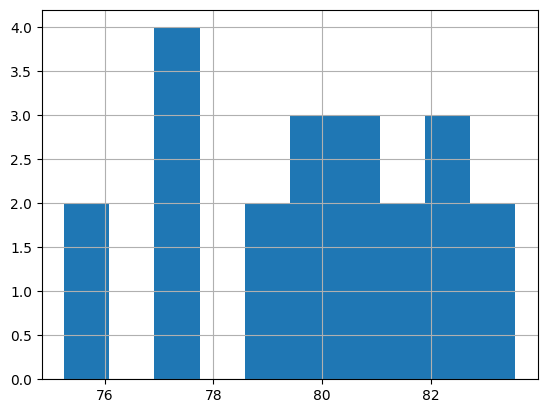

In [43]:
suppl['Life Expectancy'].hist()  # to visualize the distribution

In [44]:
suppl['Median Household Income'].describe()  #:)

count        21.000000
mean      85164.428571
std       18509.199112
min       54179.000000
25%       73168.000000
50%       79953.000000
75%      100281.000000
max      117275.000000
Name: Median Household Income, dtype: float64

In [45]:
correlations = suppl.corr() #aok good
correlations

<ipython-input-45-fceff81795c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = suppl.corr() #aok good


,Life Expectancy,Age-Adjusted Death Rate,% Disconnected Youth,Median Household Income,Suicide Rate (Age-Adjusted),% Severe Housing Cost Burden
Life Expectancy,1.000000,-0.979361,-0.499455,0.755693,-0.523657,-0.157413
Age-Adjusted Death Rate,-0.979361,1.000000,0.598997,-0.840585,0.453989,0.268657
% Disconnected Youth,-0.499455,0.598997,1.000000,-0.713285,-0.110557,0.570254
Median Household Income,0.755693,-0.840585,-0.713285,1.000000,-0.076933,-0.633478
Suicide Rate (Age-Adjusted),-0.523657,0.453989,-0.110557,-0.076933,1.000000,-0.515644
% Severe Housing Cost Burden,-0.157413,0.268657,0.570254,-0.633478,-0.515644,1.000000


In [46]:
infood['County']=infood['County'].str.strip()
healthrank['County']=healthrank['County'].str.strip()
infoodrank = pd.merge(infood, healthrank, on="County", how="outer", indicator=True)
infoodrank

,County,Imprisonment Rate,%Food Insecurity,2021 Health Ranking,_merge
0,Bergen,50,7.9,4,both
1,Essex,351,12.3,17,both
2,Middlesex,133,8.4,5,both
3,Hudson,143,12.2,9,both
4,Monmouth,131,7.8,6,both
5,Ocean,88,9.8,10,both
6,Union,195,8.3,8,both
7,Passaic,265,12.0,14,both
8,Camden,345,10.9,19,both
9,Morris,40,6.4,1,both


In [47]:
del infoodrank['_merge']
withsuppl=pd.merge(infoodrank, suppl, on='County', how='outer', indicator=True)
withsuppl
del withsuppl['_merge']

In [48]:
withsuppl = withsuppl.rename(columns={'County': 'County of Residence'})

In [49]:
print(withsuppl)

   County of Residence  Imprisonment Rate  %Food Insecurity  \
0               Bergen                 50               7.9   
1                Essex                351              12.3   
2            Middlesex                133               8.4   
3               Hudson                143              12.2   
4             Monmouth                131               7.8   
5                Ocean                 88               9.8   
6                Union                195               8.3   
7              Passaic                265              12.0   
8               Camden                345              10.9   
9               Morris                 40               6.4   
10          Burlington                127               7.1   
11              Mercer                263               8.3   
12            Somerset                 82               5.7   
13          Gloucester                124               8.2   
14            Atlantic                364              

merge with final_merged from ps 2. will change var name from 'County' to "County of Residence" (since ED data is patient aggregates)

#Unemployment, ED, uninsured, homeless merge

In [50]:
ueuh['County of Residence'] = ueuh['County of Residence'].str.replace(' County', '', regex=False)

<ipython-input-50-6848037a87bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ueuh['County of Residence'] = ueuh['County of Residence'].str.replace(' County', '', regex=False)


In [51]:
ueuh.columns

Index(['Year', 'County of Residence', 'County of Residence ID',
       'Number of ED Visits', 'Total Population Estimates',
       'Crude Rates per 10,000 - ED Visits', 'Unemployment Rate', 'Region',
       'Total Number of Uninsured Persons', '% of Uninsured Persons',
       'Total Homeless Persons ', '% of Total Homeless Persons ',
       'Chronic Homeless Persons ', '% of Chronic Homeless Persons ',
       'Unsheltered Homeless Persons ', '% of Unsheltered Homeless Persons ',
       'ueuH'],
      dtype='object')

In [52]:
print(ueuh)

      Year County of Residence  County of Residence ID  Number of ED Visits  \
0   2021.0            Atlantic                     1.0             119344.0   
1   2021.0              Bergen                     2.0             187674.0   
2   2021.0          Burlington                     3.0             117235.0   
3   2021.0              Camden                     4.0             207627.0   
4   2021.0            Cape May                     5.0              31155.0   
5   2021.0          Cumberland                     6.0              96481.0   
6   2021.0               Essex                     7.0             303723.0   
7   2021.0          Gloucester                     8.0              59812.0   
8   2021.0              Hudson                     9.0             199478.0   
9   2021.0           Hunterdon                    10.0              24527.0   
10  2021.0              Mercer                    11.0             134627.0   
11  2021.0           Middlesex                    12

# First full merge

In [53]:
fullED = ueuh.merge(withsuppl, on='County of Residence', how='outer')
print(fullED)
# note that disconnected youth has a missing value for Warren county

      Year County of Residence  County of Residence ID  Number of ED Visits  \
0   2021.0            Atlantic                     1.0             119344.0   
1   2021.0              Bergen                     2.0             187674.0   
2   2021.0          Burlington                     3.0             117235.0   
3   2021.0              Camden                     4.0             207627.0   
4   2021.0            Cape May                     5.0              31155.0   
5   2021.0          Cumberland                     6.0              96481.0   
6   2021.0               Essex                     7.0             303723.0   
7   2021.0          Gloucester                     8.0              59812.0   
8   2021.0              Hudson                     9.0             199478.0   
9   2021.0           Hunterdon                    10.0              24527.0   
10  2021.0              Mercer                    11.0             134627.0   
11  2021.0           Middlesex                    12

the fullED dataset is modified and renamed in the next subsection.

In [54]:
from scipy.stats import pearsonr
corr_A_B, p_value_A_B = pearsonr(fullED['% Severe Housing Cost Burden'], fullED['Number of ED Visits'])
print(f"Correlation between A and B: {corr_A_B:.3f}")
print(f"P-value for correlation between A and B: {p_value_A_B:.3f}")

Correlation between A and B: 0.694
P-value for correlation between A and B: 0.000


#Final dataset, and reshaping

after evaluating research purpose, i want to: 1) delete raw totals and use rates instead to standardize (especially because most vars were already reported using population denominators), and 2) then explore longtitudinal trends of interesting vars and make some simple pannels.

In [55]:
fullED.drop(columns=['Year', 'Total Number of Uninsured Persons', 'Total Population Estimates'], inplace=True)
fullED.rename(columns={'Imprisonment Rate': '2020 Imprisonment Rate'}, inplace=True)
# to differentiate better, bc all vars were from 2021 except for imprisonment rate (2020 the latest available)
EDdata2021 = fullED

In [56]:
EDdata2021['Crude Rates per 10,000 - ED Visits'] = EDdata2021['Crude Rates per 10,000 - ED Visits']/ 100
EDdata2021.rename(columns={'Crude Rates per 10,000 - ED Visits': 'ED Visits per 100'}, inplace=True)

in particular, i want to explore associations between measures of ED visits and indicator of severe housing burden in the population. so, 1) download and import long data on ED crude rate from the same government data query portal (link in PS2), 2) crude rate per 10,000/100 so it is standardized the same way as "proportion with severe housing burden" is.

In [57]:
EDdata2021.columns

Index(['County of Residence', 'County of Residence ID', 'Number of ED Visits',
       'ED Visits per 100', 'Unemployment Rate', 'Region',
       '% of Uninsured Persons', 'Total Homeless Persons ',
       '% of Total Homeless Persons ', 'Chronic Homeless Persons ',
       '% of Chronic Homeless Persons ', 'Unsheltered Homeless Persons ',
       '% of Unsheltered Homeless Persons ', 'ueuH', '2020 Imprisonment Rate',
       '%Food Insecurity', '2021 Health Ranking', 'Life Expectancy',
       'Age-Adjusted Death Rate', '% Disconnected Youth',
       'Median Household Income', 'Suicide Rate (Age-Adjusted)',
       '% Severe Housing Cost Burden'],
      dtype='object')

In [58]:
EDdata2021['2020 Imprisonment Rate'] = EDdata2021['2020 Imprisonment Rate']/ 1000
EDdata2021.rename(columns={'2020 Imprisonment Rate': '2020 % of Imprisoned persons'}, inplace=True)

##Key metrics by county

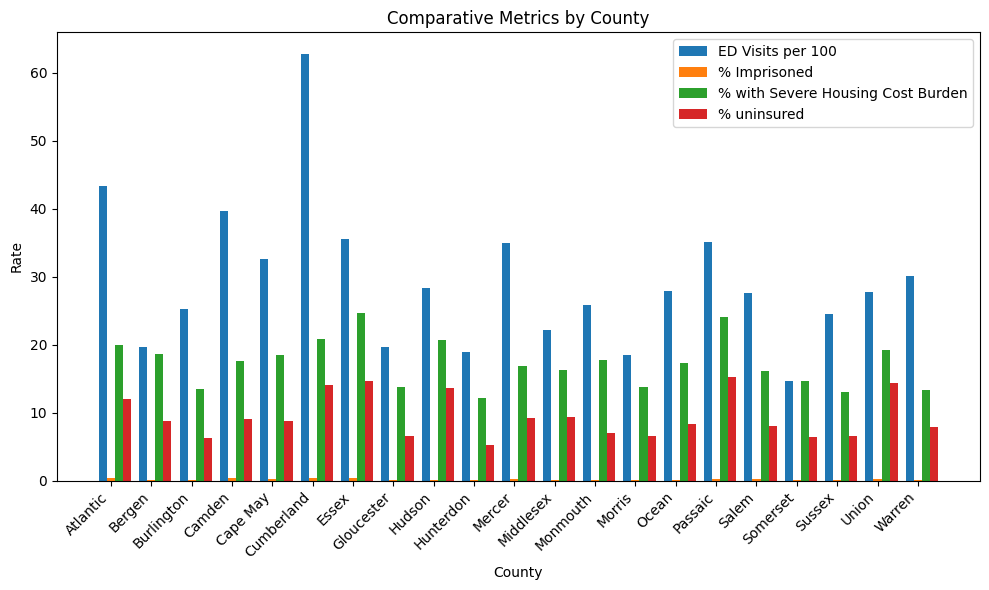

In [59]:
import matplotlib.pyplot as plt
import numpy as np
selected_columns = ['County of Residence', 'ED Visits per 100', '2020 % of Imprisoned persons', '% Severe Housing Cost Burden','% of Uninsured Persons']
df_selected = EDdata2021[selected_columns]


df_selected.columns = ['County', 'ED Visits per 100', '% Imprisoned ', '% with Severe Housing Cost Burden','% uninsured']

df_melted = df_selected.melt(id_vars='County', var_name='Metric', value_name='Rate')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
unique_metrics = df_melted['Metric'].unique()
bar_width = 0.2
# Create an offset array for bar placement
offset = np.arange(len(df_selected['County']))

for i, metric in enumerate(unique_metrics):
    subset = df_melted[df_melted['Metric'] == metric]
    ax.bar(offset + i*bar_width, subset['Rate'], width=bar_width, label=metric)


ax.set_xticks(offset + bar_width)
ax.set_xticklabels(df_selected['County'], rotation=45, ha='right')
ax.set_xlabel('County')
ax.set_ylabel('Rate')
ax.set_title('Comparative Metrics by County')
ax.legend()

plt.tight_layout()
plt.show()


In [75]:
wideunsheltered=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/19-22unsheltered.xlsx')
wideunsheltered

,County,2019,2020,2021,2022
0,Atlantic,6,9,15,11
1,Bergen,0,0,1,2
2,Burlington,2,1,1,2
3,Camden,11,12,9,14
4,Cape May,1,0,1,0
5,Cumberland,2,2,2,1
6,Essex,23,23,11,15
7,Gloucester,1,0,0,1
8,Hudson,18,17,19,15
9,Hunterdon,1,1,1,1


In [60]:
longED=pd.read_excel("https://github.com/worldterminator/worldterminator/raw/main/16-21EDlongdata.xlsx")
longED

,Year,County,Number of ED Visits,Population,"Crude Rate per 10,000"
0,2016,Atlantic,129060,267212,4829.9
1,2016,Bergen,219470,928381,2364.0
2,2016,Burlington,145521,447092,3254.8
3,2016,Camden,260483,507119,5136.5
4,2016,Cape May,38270,93825,4078.9
...,...,...,...,...,...
121,2021,Salem,17932,65046,2756.8
122,2021,Somerset,50452,345647,1459.6
123,2021,Sussex,35567,145543,2443.8
124,2021,Union,158743,572114,2774.7


In [61]:
longED['Crude Rate per 10,000'] = longED['Crude Rate per 10,000']/ 100
longED.rename(columns={'Crude Rate per 10,000': 'ED Visits per 100'}, inplace=True)

In [62]:
longED = longED[['Year', 'County','ED Visits per 100']]

then i also multiple years of data, in wide format, on proportion with severe housing burden, downloaded and complied from the same source (link in PS3).
note that I kept only the % measure and dropped the number of people with severe burden completely, since a. it's clearly better that both vars are standardized to account for varying population sizes, and b. the raw number of people with severe housing burden for 2022 is not available in the report.

per unit of residents (100), are total ED visits cases associated with the number of individuals facing severe housing burden?

In [63]:
longED

,Year,County,ED Visits per 100
0,2016,Atlantic,48.299
1,2016,Bergen,23.640
2,2016,Burlington,32.548
3,2016,Camden,51.365
4,2016,Cape May,40.789
...,...,...,...
121,2021,Salem,27.568
122,2021,Somerset,14.596
123,2021,Sussex,24.438
124,2021,Union,27.747


##Panel datasets

In [64]:
# convert year-county ED Visits per 100 data to a wide format
wideED = longED.pivot_table(index='County', columns='Year', values='ED Visits per 100').reset_index()
print(wideED)

Year      County    2016    2017    2018    2019    2020    2021
0       Atlantic  48.299  45.289  49.953  46.743  35.519  43.403
1         Bergen  23.640  22.250  23.257  23.482  15.942  19.676
2     Burlington  32.548  32.044  31.312  30.292  21.631  25.252
3         Camden  51.365  51.874  49.588  48.141  35.906  39.641
4       Cape May  40.789  40.419  41.045  39.666  29.183  32.568
5     Cumberland  63.424  62.709  57.100  68.657  53.383  62.802
6          Essex  46.644  44.300  42.216  43.870  30.013  35.527
7     Gloucester  30.718  29.530  25.421  24.804  18.244  19.644
8         Hudson  36.652  35.451  37.427  36.987  23.944  28.397
9      Hunterdon  21.075  19.329  18.095  19.480  14.944  18.878
10        Mercer  46.407  46.291  45.383  47.340  33.088  34.887
11     Middlesex  28.225  27.721  26.916  26.654  18.106  22.217
12      Monmouth  33.264  32.057  32.006  30.683  20.213  25.808
13        Morris  22.304  21.893  21.637  22.497  15.303  18.411
14         Ocean  35.907 

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


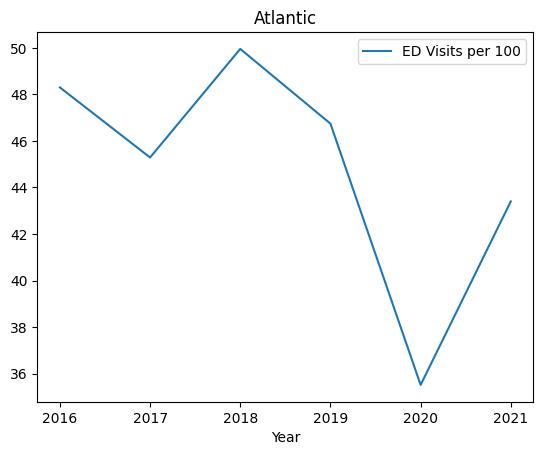

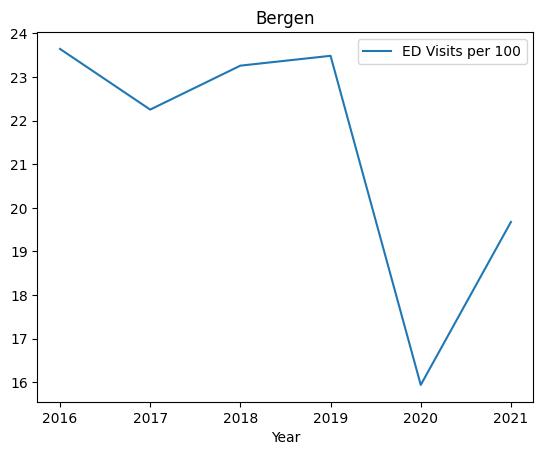

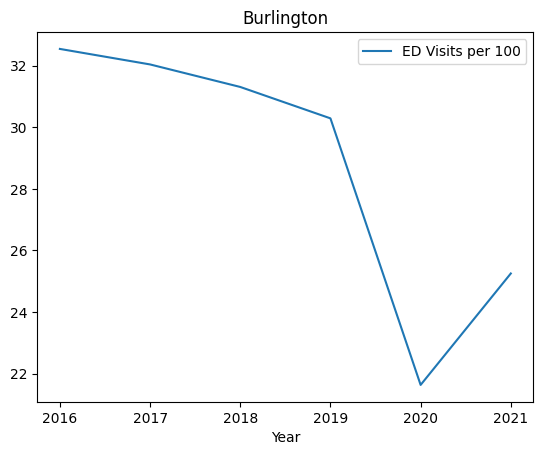

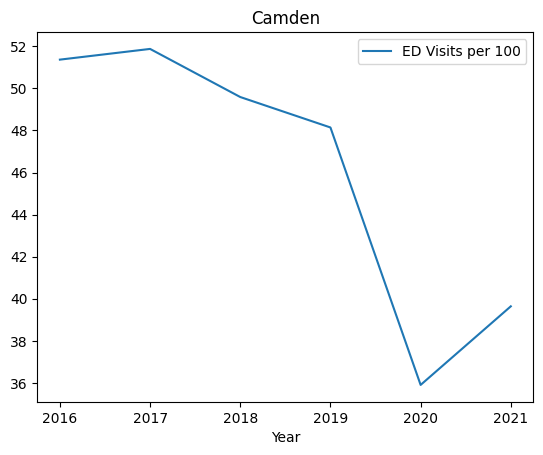

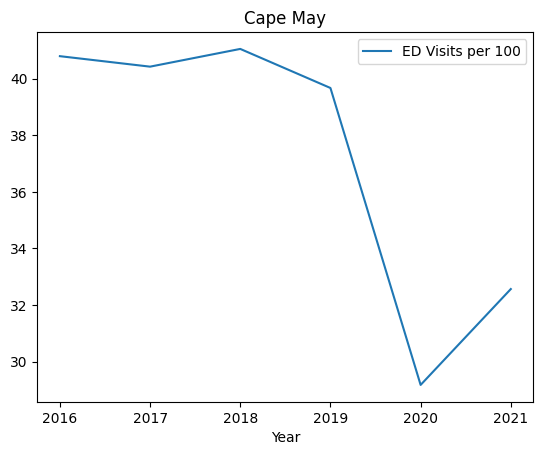

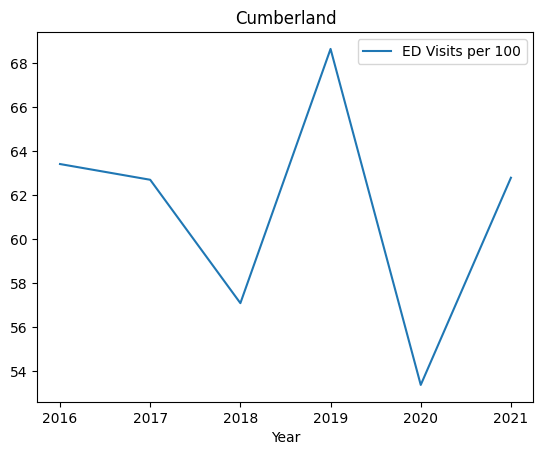

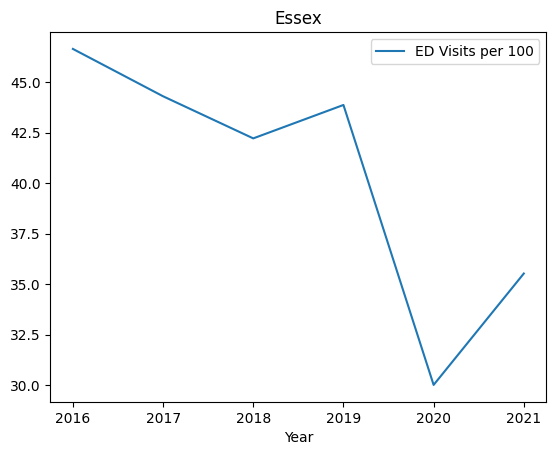

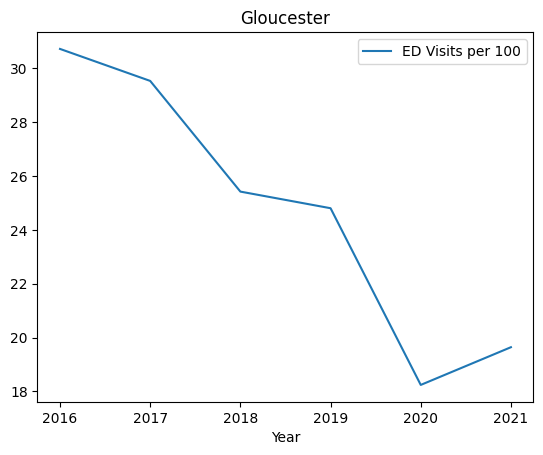

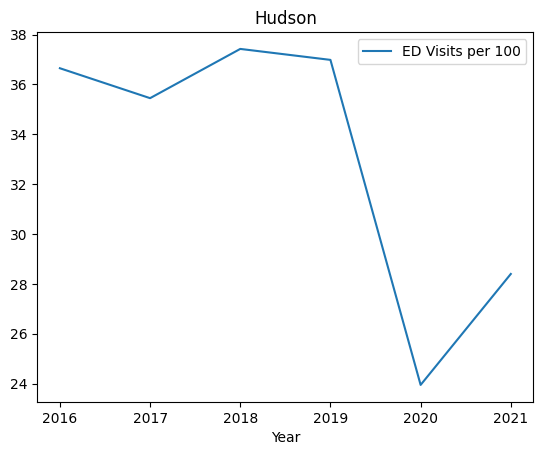

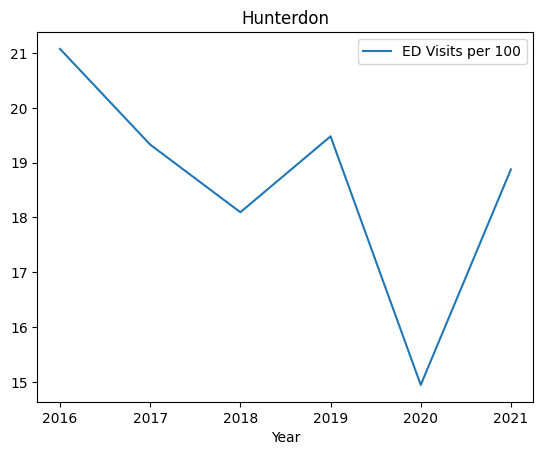

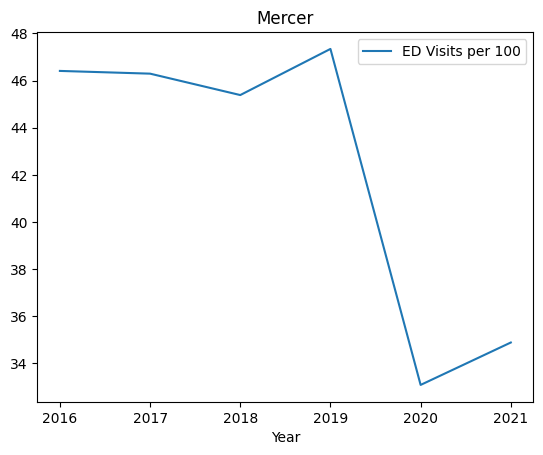

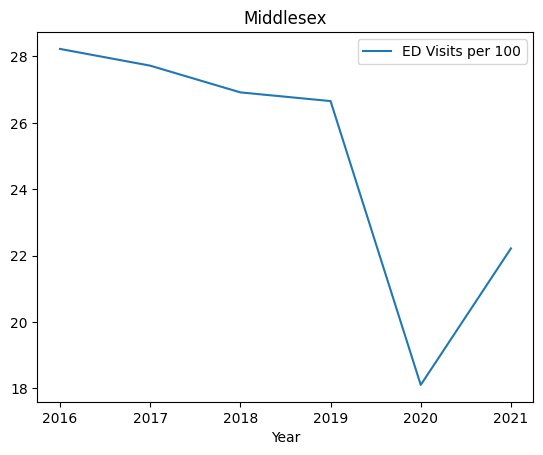

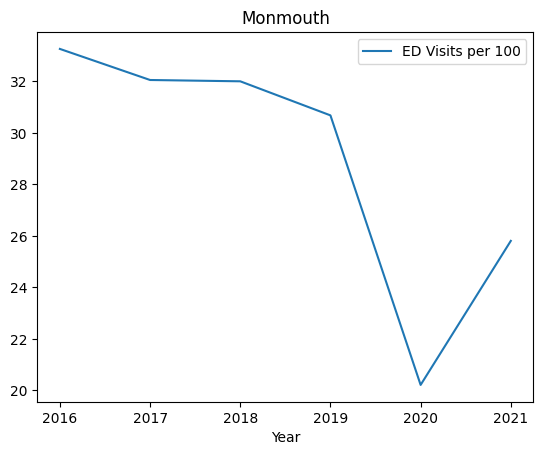

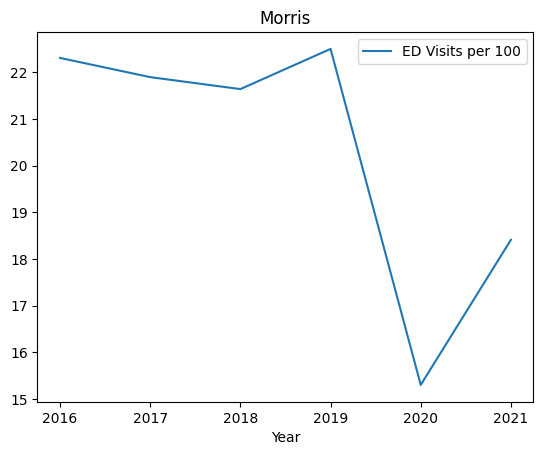

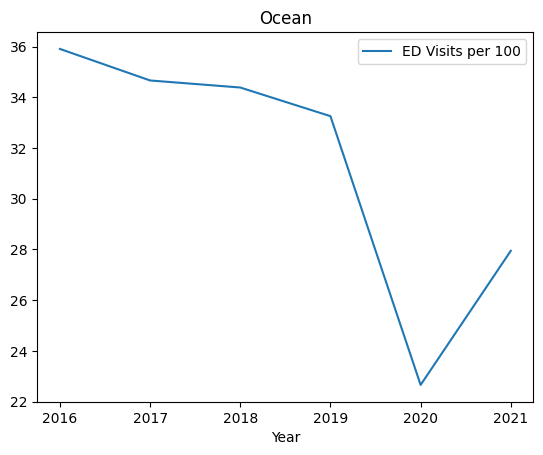

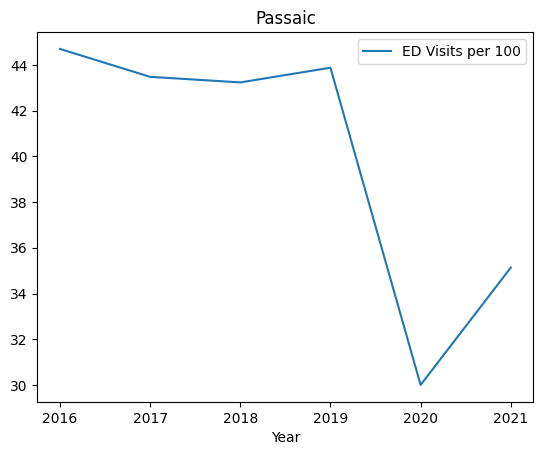

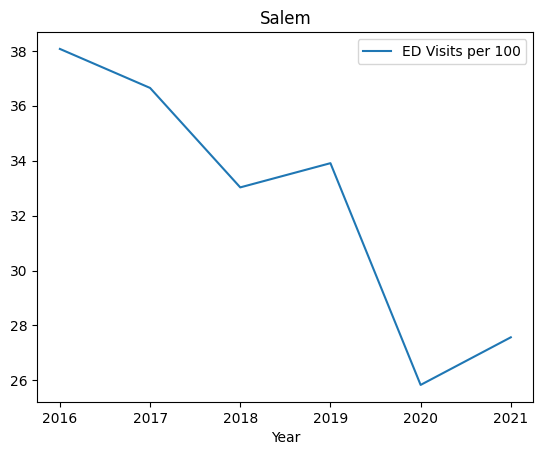

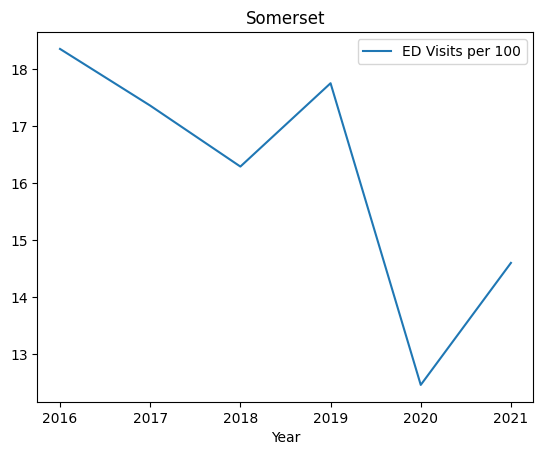

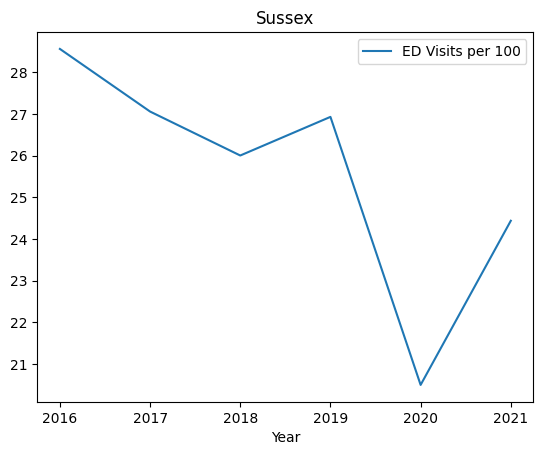

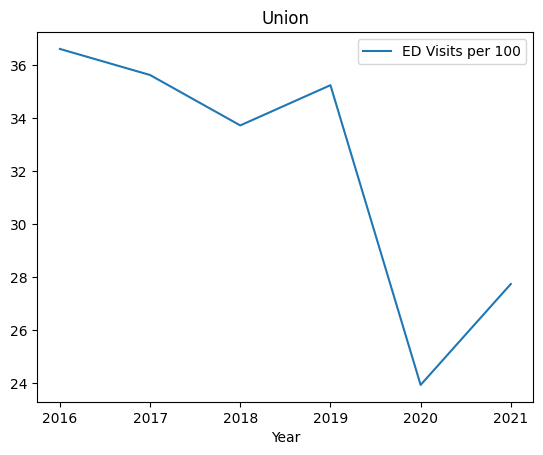

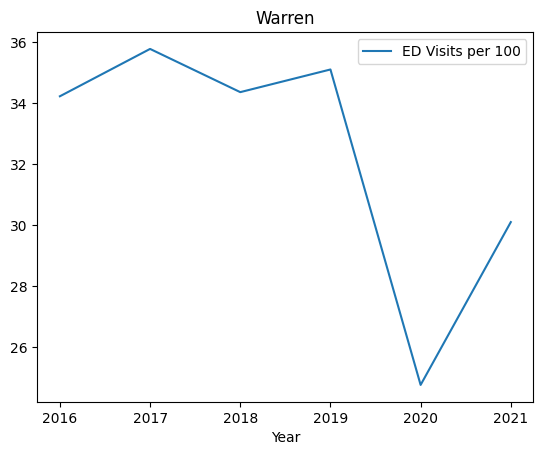

In [65]:
import matplotlib.pyplot as plt
counties = longED['County'].unique()
for county in counties:
    subset = longED[longED['County'] == county]
    subset.plot(x='Year', y='ED Visits per 100', title=county)

plt.show()
#here I want to graph a trend for each county. so subset values for each county and plot them~

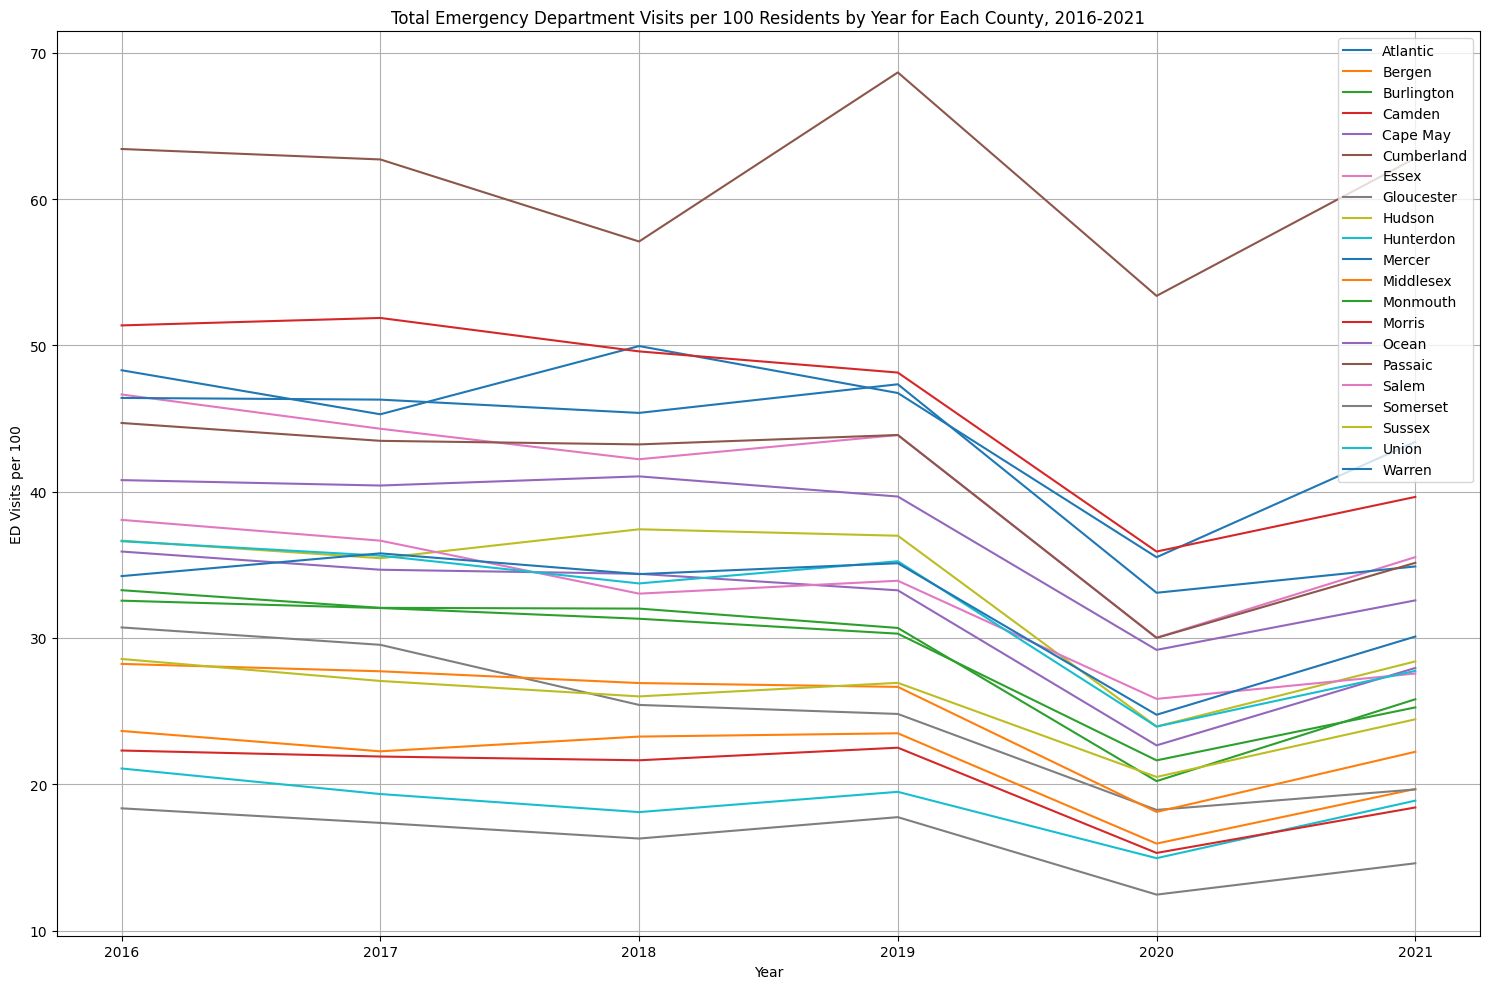

In [66]:
# most counties had a peak in 2019:( and a big drop in 2020:), and then a rebounce in 2021
# intepret with regard to early vs. later pandemic practices and policies? would be interesting if we have monthly data

# to compare trends, i plotted them again into one graph
counties = longED['County'].unique()
plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed

for county in counties:
    subset = longED[longED['County'] == county]
    plt.plot(subset['Year'], subset['ED Visits per 100'], label=county)

plt.title('Total Emergency Department Visits per 100 Residents by Year for Each County, 2016-2021')
plt.xlabel('Year')
plt.ylabel('ED Visits per 100')
plt.legend()  # Display a legend to differentiate the counties
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
widehousing=pd.read_excel("https://github.com/worldterminator/worldterminator/raw/main/19-21housing.xlsx")

#rename the vars for the convenience of reshaping; will give name to the columns later
housing_columns = {
    "2019 %Severe Housing Cost Burden": "2019",
    "2020 %Severe Housing Cost Burden": "2020",
    "2021 %Severe Housing Cost Burden": "2021",
    "2022 %Severe Housing Cost Burden": "2022"
}
widehousing = widehousing.rename(columns=housing_columns)
widehousing

,County,2019,2020,2021,2022
0,Atlantic,22.651037,21.206188,19.982839,20.307692
1,Bergen,19.959523,19.535095,18.584412,18.627113
2,Burlington,14.448726,14.280635,13.498833,13.685522
3,Camden,18.689006,18.308578,17.577162,17.632164
4,Cape May,19.537128,19.370698,18.500990,18.285281
5,Cumberland,21.323960,20.844871,20.788241,19.950100
6,Essex,25.271614,25.126403,24.710859,24.114164
7,Gloucester,14.659158,14.153446,13.825050,13.692782
8,Hudson,22.738068,22.015803,20.696751,21.233834
9,Hunterdon,13.496707,13.553594,12.182642,13.124534


In [68]:
stacked_housing = widehousing.set_index('County').stack()
#stack by county to take a look

In [69]:
#now try converting it to long and create the Year var, so I could groupby Year later~
longhousing = widehousing.melt(id_vars='County',
                               value_vars=['2019', '2020', '2021', '2022'],
                               var_name='Year',
                               value_name='%Severe Housing Cost Burden')
longhousing

,County,Year,%Severe Housing Cost Burden
0,Atlantic,2019,22.651037
1,Bergen,2019,19.959523
2,Burlington,2019,14.448726
3,Camden,2019,18.689006
4,Cape May,2019,19.537128
...,...,...,...
79,Salem,2022,16.027801
80,Somerset,2022,14.142378
81,Sussex,2022,13.414519
82,Union,2022,19.756449


In [70]:
yearly_mean = longhousing.groupby('Year')['%Severe Housing Cost Burden'].mean()
yearly_mean

Year
2019    18.440542
2020    17.996255
2021    17.269534
2022    17.243962
Name: %Severe Housing Cost Burden, dtype: float64

In [71]:
longhousing.dtypes #make sure of same var types for merging

County                          object
Year                            object
%Severe Housing Cost Burden    float64
dtype: object

In [77]:
wideunsheltered

,County,2019,2020,2021,2022
0,Atlantic,6,9,15,11
1,Bergen,0,0,1,2
2,Burlington,2,1,1,2
3,Camden,11,12,9,14
4,Cape May,1,0,1,0
5,Cumberland,2,2,2,1
6,Essex,23,23,11,15
7,Gloucester,1,0,0,1
8,Hudson,18,17,19,15
9,Hunterdon,1,1,1,1


In [78]:
longunsheltered = pd.melt(wideunsheltered, id_vars='County',
                               var_name='Year',
                               value_name='%Unsheltered Homeless')


In [79]:
longunsheltered

,County,Year,%Unsheltered Homeless
0,Atlantic,2019,6
1,Bergen,2019,0
2,Burlington,2019,2
3,Camden,2019,11
4,Cape May,2019,1
...,...,...,...
79,Salem,2022,0
80,Somerset,2022,0
81,Sussex,2022,0
82,Union,2022,6


In [72]:
# now i want to merge the two by county and year, but first convent year to int
longhousing['Year'] = longhousing['Year'].astype(int)
EDhousing = pd.merge(longED, longhousing, on=['County', 'Year'])
print(EDhousing)

    Year      County  ED Visits per 100  %Severe Housing Cost Burden
0   2019    Atlantic             46.743                    22.651037
1   2019      Bergen             23.482                    19.959523
2   2019  Burlington             30.292                    14.448726
3   2019      Camden             48.141                    18.689006
4   2019    Cape May             39.666                    19.537128
..   ...         ...                ...                          ...
58  2021       Salem             27.568                    16.169886
59  2021    Somerset             14.596                    14.638657
60  2021      Sussex             24.438                    13.045224
61  2021       Union             27.747                    19.205608
62  2021      Warren             30.096                    13.324427

[63 rows x 4 columns]


In [80]:
EDhousingunsheltered=pd.merge (EDhousing, longunsheltered,on=['County','Year'])
print(EDhousingunsheltered)

    Year      County  ED Visits per 100  %Severe Housing Cost Burden  \
0   2019    Atlantic             46.743                    22.651037   
1   2019      Bergen             23.482                    19.959523   
2   2019  Burlington             30.292                    14.448726   
3   2019      Camden             48.141                    18.689006   
4   2019    Cape May             39.666                    19.537128   
..   ...         ...                ...                          ...   
58  2021       Salem             27.568                    16.169886   
59  2021    Somerset             14.596                    14.638657   
60  2021      Sussex             24.438                    13.045224   
61  2021       Union             27.747                    19.205608   
62  2021      Warren             30.096                    13.324427   

    %Unsheltered Homeless  
0                       6  
1                       0  
2                       2  
3                      

##Regression: ED visits by % Severe Housing Burden

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = EDhousingunsheltered
df = df.rename(columns={"%Severe Housing Cost Burden": "Severe_Housing_Cost_Burden"})
df = df.rename(columns={"ED Visits per 100": "ED_Visits_per_100"})
df = df.rename(columns={"%Unsheltered Homeless": "Unsheltered_Homeless"})
# Fixed Effect Regression with Year as the fixed effect and ED Visits as the outcome
model = smf.ols('ED_Visits_per_100 ~ C(Year) + Severe_Housing_Cost_Burden + Unsheltered_Homeless', data=df).fit()

# To view the summary of the regression model
print(model.summary())

#sig effect revealed by year fixed effects; percentage with severe housing burden remains predictive, r square good as well

                            OLS Regression Results                            
Dep. Variable:      ED_Visits_per_100   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.82e-06
Time:                        06:48:23   Log-Likelihood:                -224.78
No. Observations:                  63   AIC:                             459.6
Df Residuals:                      58   BIC:                             470.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

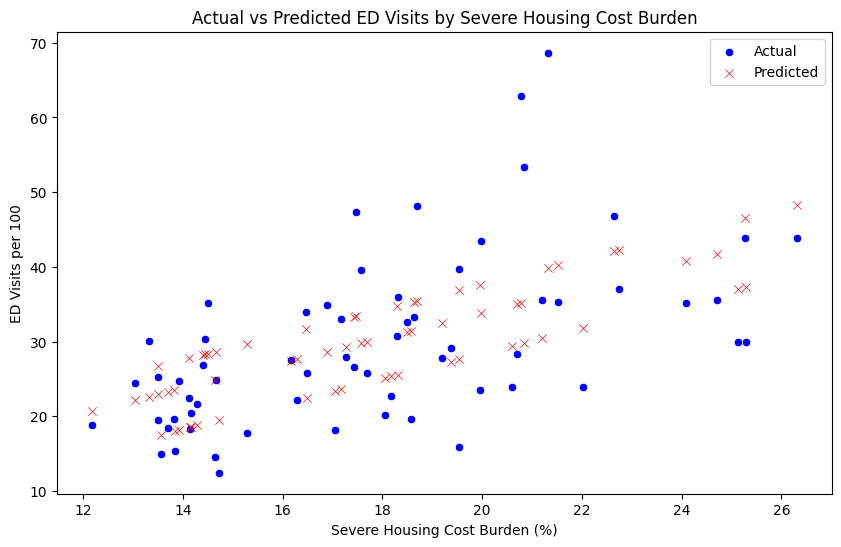

In [74]:
import seaborn as sns
df['Predicted_ED_Visits'] = model.predict(df)
# sorting  based on 'Severe_Housing_Cost_Burden' to make the trend line smooth
df_sorted = df.sort_values('Severe_Housing_Cost_Burden')
# plotting~
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Severe_Housing_Cost_Burden', y='ED_Visits_per_100', data=df, color='blue', marker='o', label='Actual')

sns.scatterplot(x='Severe_Housing_Cost_Burden', y='Predicted_ED_Visits', data=df, color='red', marker='x', label='Predicted')
plt.xlabel('Severe Housing Cost Burden (%)')
plt.ylabel('ED Visits per 100')
plt.title('Actual vs Predicted ED Visits by Severe Housing Cost Burden')

plt.legend()
plt.show()